<a href="https://colab.research.google.com/github/hanuk0613/storage/blob/master/Basic_Image_Classification_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)



2.3.0


In [2]:
#패션 MNIST 데이터셋 임포트하기
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# 훈련 세트에 60000개의 이미지, 28*28픽셀
train_images.shape

(60000, 28, 28)

In [ ]:
# 60000개의 레이블
len(train_labels)

60000

In [ ]:
# 각 레이블은 0~9사이 정수
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# 테스트 세트에 10000개의 이미지, 28*28픽셀
test_images.shape

(10000, 28, 28)

In [ ]:
# 테스트 세트는 10000개의 이미지에 대한 레이블이 있음
len(test_labels)

10000

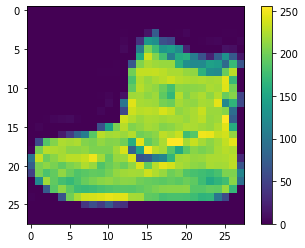

In [ ]:
# 데이터 전처리
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# 신경망 모델에 주입하기 전에 이 값의 범위를 0~1사이로 조정하려면 255로 나누어야 함
train_images = train_images/255.0
test_images = test_images/255.0

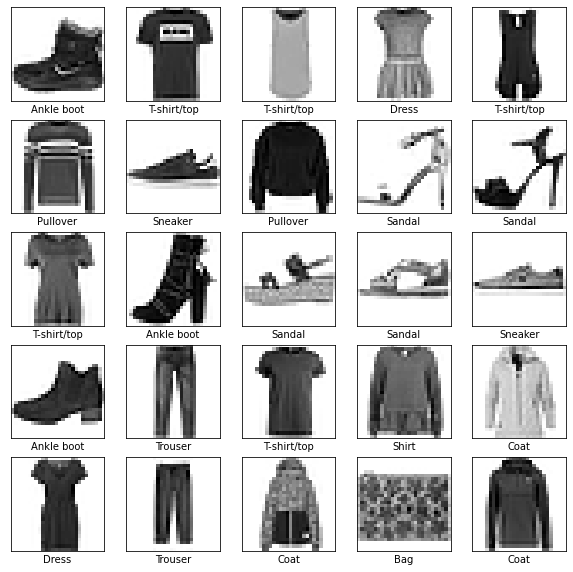

In [ ]:
# 훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름 출력
plt.figure(figsize=(10, 10))
for i in range(25):
 plt.subplot(5,5,i+1)
 plt.xticks([ ])
 plt.yticks([ ])
 plt.grid(False)
 plt.imshow(train_images[i], cmap=plt.cm.binary)
 plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# 층 설정
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 모델 훈련
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0936 - accuracy: 0.6554
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6429 - accuracy: 0.7661
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5678 - accuracy: 0.7951
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5247 - accuracy: 0.8138
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4959 - accuracy: 0.8255


In [ ]:
# 정확도 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.5091 - accuracy: 0.8165

테스트 정확도: 0.8165000081062317


In [ ]:
# 예측 만들기
predictions = model.predict(test_images)
# 첫번 째 예측
predictions[0]


array([1.9315369e-06, 1.9057028e-08, 7.0708093e-06, 8.1003391e-06,
       1.3401886e-05, 1.2726685e-01, 3.0739953e-05, 3.0829823e-01,
       4.5128432e-03, 5.5986077e-01], dtype=float32)

In [ ]:
# 가장 높은 신뢰도를 가진 레이블
np.argmax(predictions[0])

9

In [ ]:
# 모델은 이 이미지가 앵클 부츠(class_name[9])라고 가장 확신
test_labels[0]

9

In [ ]:
# 10개 클래스에 대한 예측을 모두 그래프로 표현
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

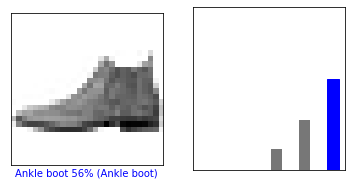

In [ ]:
# 0번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

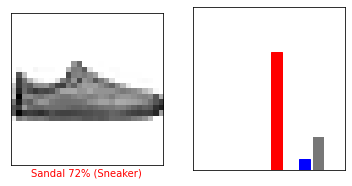

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

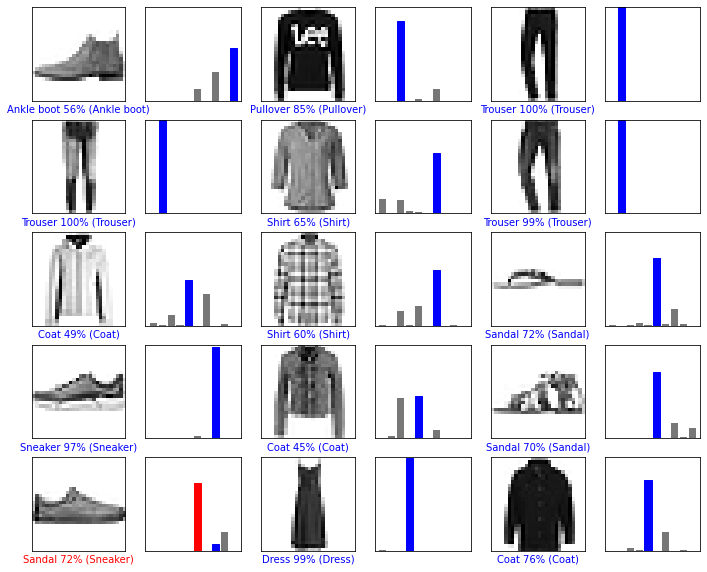

In [ ]:
# 몇 개의 이미지의 예측을 출력, 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색
# 숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
# 테스트 세트에서 이미지 하나를 선택
img = test_images[0]

print(img.shape)

(28, 28)


In [ ]:
# 이미지 하나만 사용할 때도 배치에 추가
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
# 이미지의 예측 만듬
predictions_single = model.predict(img)

print(predictions_single)

[[1.93153846e-06 1.90570262e-08 7.07082154e-06 8.10034544e-06
  1.34018965e-05 1.27266839e-01 3.07399750e-05 3.08298349e-01
  4.51284274e-03 5.59860706e-01]]


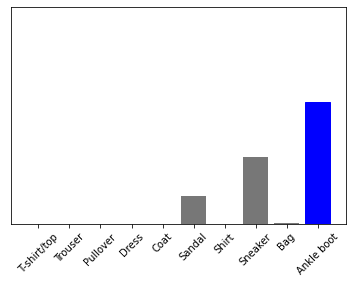

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
# model.predict는 2차원 넘파이 배열을 반환하므로 첫 번째 이미지의 예측을 선택한다.
np.argmax(predictions_single[0])

9